In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from IPython.display import Audio
import keras
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import zipfile
import os

In [5]:
PATH= r"C:\Users\USER\Downloads\AudioWAV"

In [6]:
# Get the list of files in the directory
directory_list = os.listdir(PATH)

# Initialize lists to store file paths and emotions
file_emotion = []
file_path = []

# Process each file in the directory
for file in directory_list:
    if file.endswith(".wav"):  # Process only WAV files
        file_path.append(os.path.join(PATH, file))  # Correct path concatenation
        part = file.split('_')

        # Extract emotion from filename
        emotion_code = part[2]  # Adjust if the emotion is stored in a different index
        emotion_dict = {
            'SAD': 'sad',
            'ANG': 'angry',
            'DIS': 'disgust',
            'FEA': 'fear',
            'HAP': 'happy',
            'NEU': 'neutral'
        }
        file_emotion.append(emotion_dict.get(emotion_code, 'Unknown'))  # Default to 'Unknown'

# Create DataFrame
crema_df = pd.DataFrame({'Emotions': file_emotion, 'Path': file_path})

# Save to CSV for future use
crema_df.to_csv("crema_df.csv", index=False)

# Display first few rows
print(" DataFrame Created Successfully!")
print(crema_df.head())

 DataFrame Created Successfully!
  Emotions                                               Path
0    angry  C:\Users\USER\Downloads\AudioWAV\1001_DFA_ANG_...
1  disgust  C:\Users\USER\Downloads\AudioWAV\1001_DFA_DIS_...
2     fear  C:\Users\USER\Downloads\AudioWAV\1001_DFA_FEA_...
3    happy  C:\Users\USER\Downloads\AudioWAV\1001_DFA_HAP_...
4  neutral  C:\Users\USER\Downloads\AudioWAV\1001_DFA_NEU_...


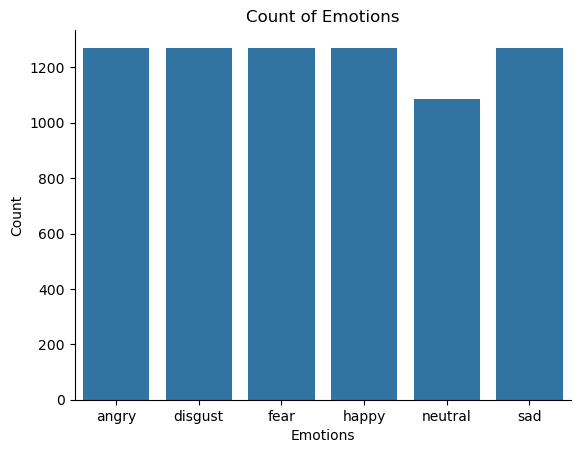

In [7]:
plt.title('Count of Emotions')
sns.countplot(x = crema_df.Emotions)
plt.ylabel('Count')
plt.xlabel('Emotions')
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

In [8]:
def waveplot(data, sr, e):
  plt.figure(figsize = (10, 3))
  plt.title(f"{e} audio waveplot")
  librosa.display.waveshow(data, sr = sr)

def spectrogram(data, sr, e):
  X = librosa.stft(data)
  Xdb = librosa.X = features.iloc[: ,: -1].values
  Y = features['labels'].valuesplitude_to_db(abs(X))
  plt.figure(figsize = (12, 3))
  plt.title(f"{e} audio spectrogram")
  librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')

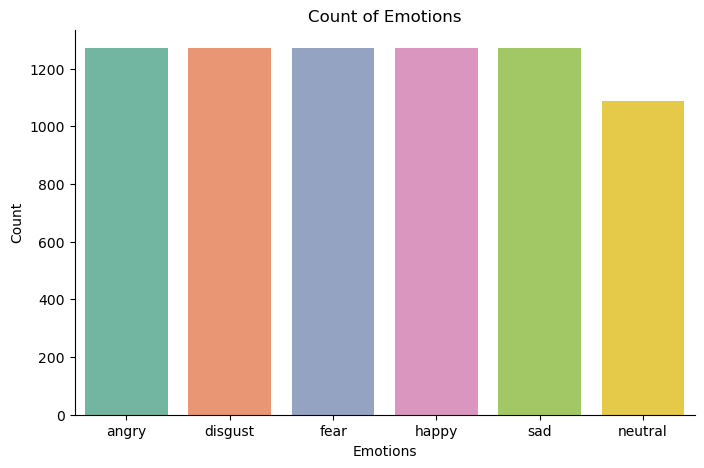

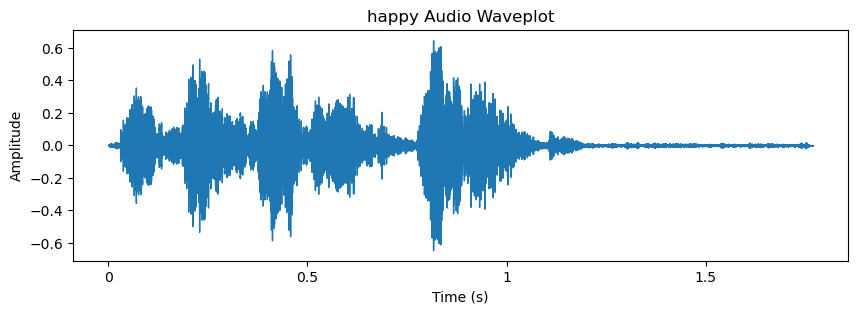

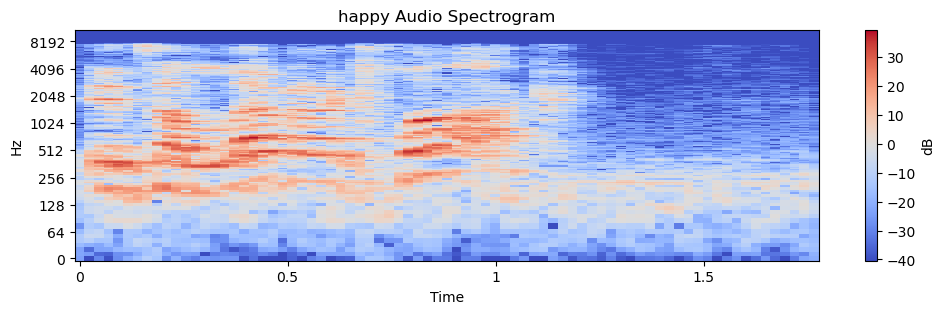

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x=crema_df.Emotions, order=crema_df.Emotions.value_counts().index, palette="Set2")
plt.title('Count of Emotions')
plt.ylabel('Count')
plt.xlabel('Emotions')
sns.despine()
plt.show()

# Define function to plot waveplot
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 3))
    plt.title(f"{emotion} Audio Waveplot")
    librosa.display.waveshow(data, sr=sr)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

# Define function to plot spectrogram
def spectrogram(data, sr, emotion):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title(f"{emotion} Audio Spectrogram")
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(label="dB")
    plt.show()
emotion = 'happy'
path = np.array(crema_df.Path[crema_df.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)    

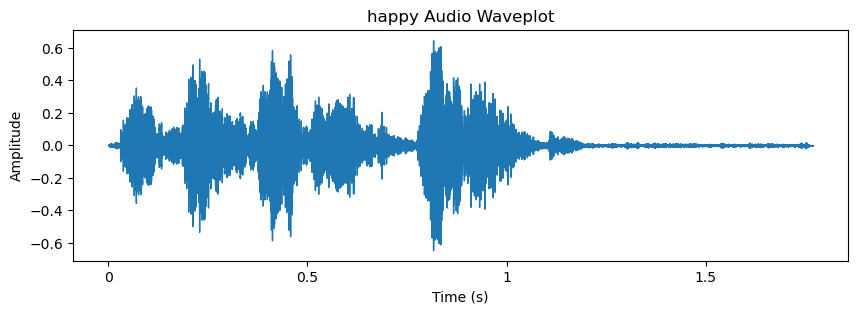

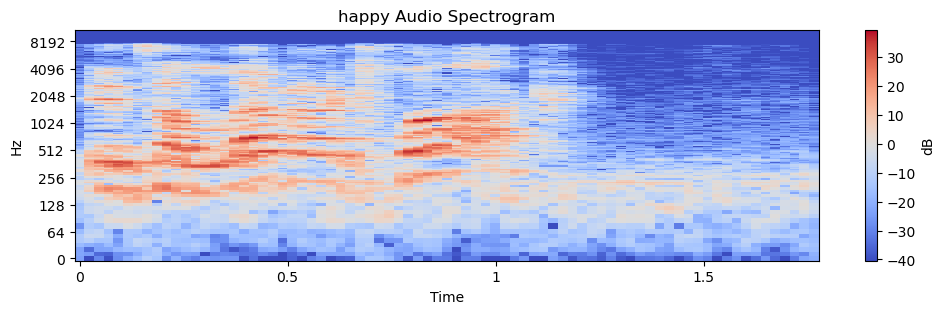

In [10]:
emotion = 'happy'
path = np.array(crema_df.Path[crema_df.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

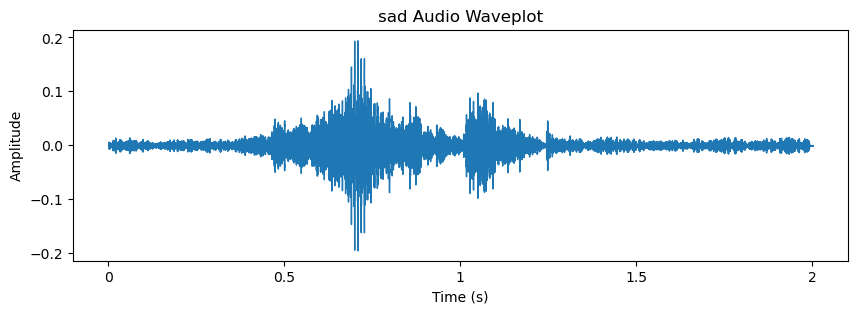

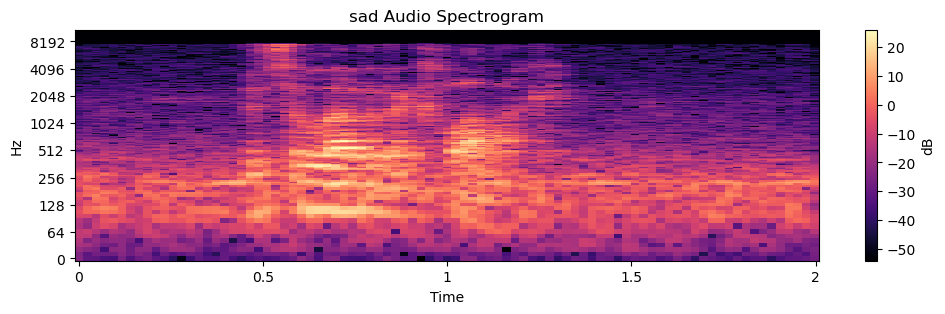

In [11]:
emotion = 'sad'
path = np.array(crema_df.Path[crema_df.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

In [12]:
def noise(data):
  noise_amp = 0.035 * np.random.uniform() * np.amax(data)
  data = data + noise_amp * np.random.normal(size = data.shape[0])
  return data

def stretch(data, rate = 0.8):
  return librosa.effects.time_stretch(data, rate = rate)

def shift(data):
  shift_range = int(np.random.uniform(low = -5, high = 5) * 1000)
  return np.roll(data, shift_range)

def pitch(data, sampling_rate, n_steps = 0.7):
  return librosa.effects.pitch_shift(data, sr = sampling_rate, n_steps = n_steps)

path = np.array(crema_df.Path)[1]
data, sample_rate = librosa.load(path)

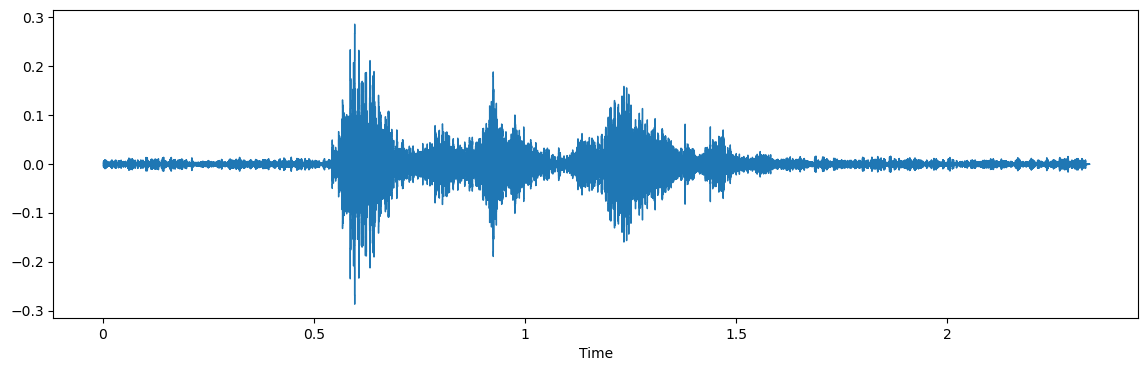

In [13]:
# Simple audio
plt.figure(figsize = (14, 4))
librosa.display.waveshow(y = data, sr = sample_rate)
Audio(path)

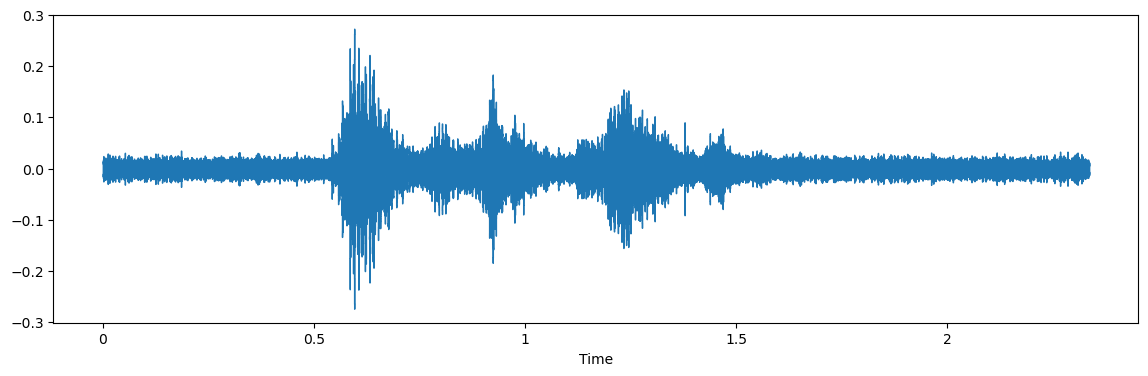

In [14]:
# Noise
x = noise(data)
plt.figure(figsize = (14, 4))
librosa.display.waveshow(y = x, sr = sample_rate)
Audio(x, rate = sample_rate)

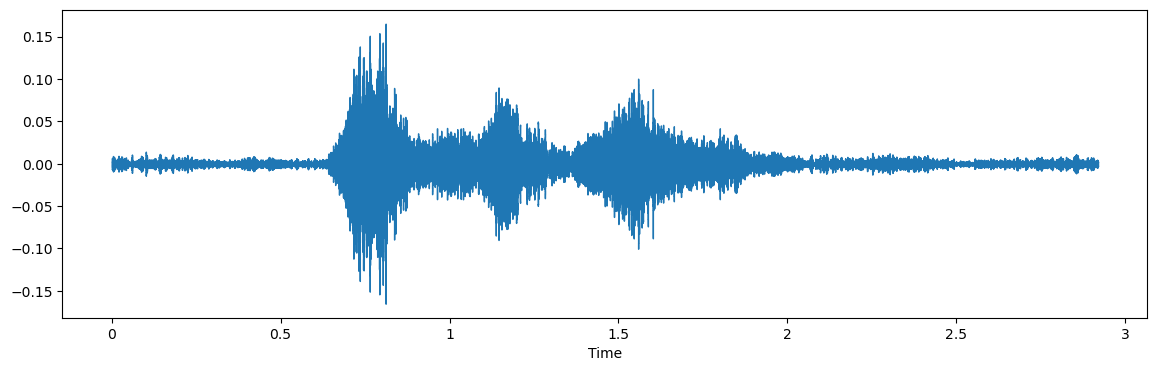

In [15]:
# Stretch
x = stretch(data)
plt.figure(figsize = (14, 4))
librosa.display.waveshow(y = x, sr = sample_rate)
Audio(x, rate = sample_rate)

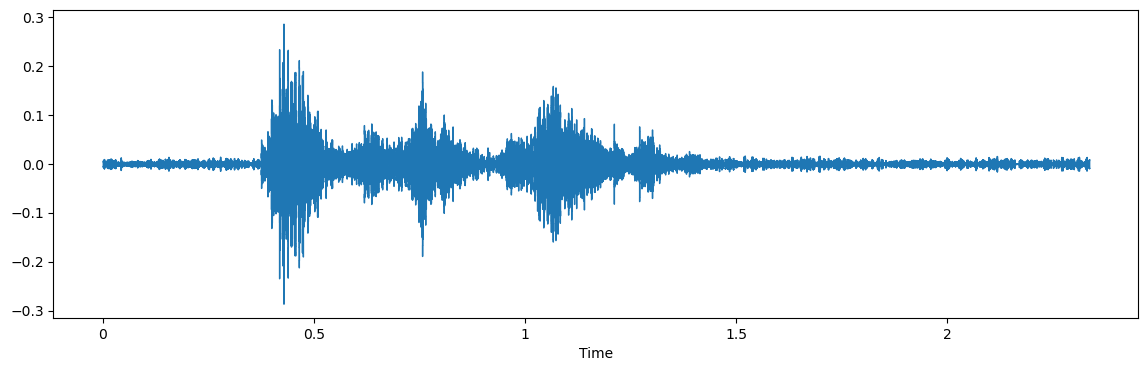

In [16]:
#Shift
x = shift(data)
plt.figure(figsize = (14, 4))
librosa.display.waveshow(y = x, sr = sample_rate)
Audio(x, rate = sample_rate)

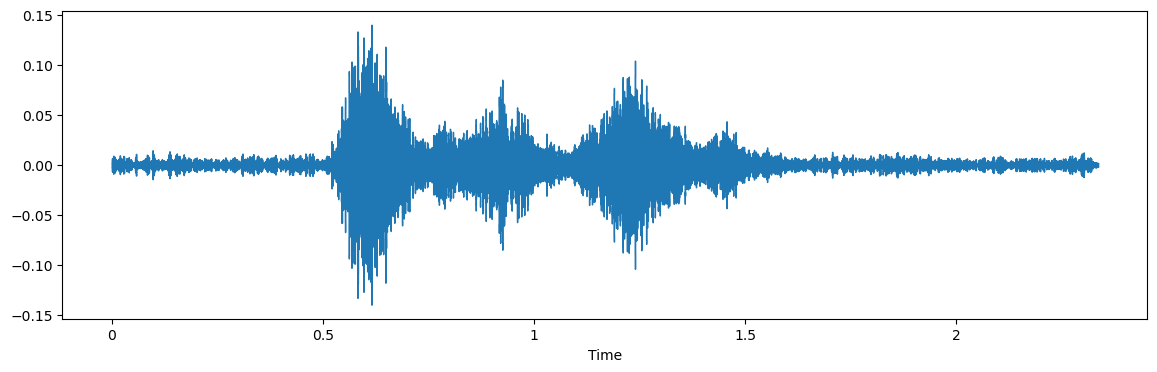

In [17]:
# Pitch
x = pitch(data, sampling_rate = sample_rate)
plt.figure(figsize = (14, 4))
librosa.display.waveshow(y = x, sr = sample_rate)
Audio(x, rate = sample_rate)

In [18]:
def extract_features(data):
    result = np.array([])

    mfcc = np.mean(librosa.feature.mfcc(y = data, sr = sample_rate, n_mfcc = 20).T, axis = 0)
    result = np.hstack((result, mfcc))

    return result

def get_features(path):
    data, sample_rate = librosa.load(path, duration = 2.5, offset = 0.6)

    res1 = extract_features(data)
    result = np.array(res1)

    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))

    lowspeed_data = stretch(data, rate = 0.7)
    res3 = extract_features(lowspeed_data)
    result = np.vstack((result, res3))

    highspeed_data = stretch(data, rate = 1.25)
    res4 = extract_features(highspeed_data)
    result = np.vstack((result, res4))

    pitch_data = pitch(data, sample_rate, n_steps = 0.8)
    res5 = extract_features(pitch_data)
    result = np.vstack((result, res5))

    shift_data = shift(data)
    res6 = extract_features(shift_data)
    result = np.vstack((result, res6))

    return result

In [19]:
X, Y = [], []
for path, emotion in zip(crema_df.Path, crema_df.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [20]:
from concurrent.futures import ThreadPoolExecutor

def process_audio_file(path, emotion, X, Y):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)
    return (path, emotion)

if __name__ == "__main__":
    X, Y = [], []
    with ThreadPoolExecutor() as executor:
        futures = []
        for path, emotion in zip(crema_df.Path, crema_df.Emotions):
            future = executor.submit(process_audio_file, path, emotion, X, Y)
            futures.append(future)

        for future in futures:
            path, emotion = future.result()
#             print(path, " : ", emotion)

In [21]:
len(X), len(Y), crema_df.Path.shape

(44652, 44652, (7442,))

In [22]:
features = pd.DataFrame(X)
features['labels'] = Y
features.to_csv('features2.csv', index = False)
features.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,labels
0,-343.071167,123.145836,-18.152159,45.152039,3.317023,11.820990,-28.171919,3.126865,-8.081865,-5.423733,...,-3.102307,-1.432722,-17.611557,5.692104,-14.337687,-5.510109,-5.364412,-2.164049,-9.902680,happy
1,-267.448662,61.676497,2.531869,26.930840,13.632500,0.349786,-14.173004,-5.627810,-5.486808,-6.250894,...,-3.027143,-4.273081,-12.748562,0.071544,-8.965421,-7.957207,-2.803432,-4.630406,-7.252847,happy
2,-377.348511,117.542236,-16.562212,42.161098,5.616234,9.837592,-26.764271,2.167044,-7.692026,-5.582357,...,-3.025406,-1.386471,-16.307165,5.676712,-13.477029,-6.213636,-5.351099,-2.271984,-9.357913,happy
3,-370.535492,122.146843,-20.278606,43.588318,3.125001,11.503021,-30.090614,1.326732,-9.913951,-5.376187,...,-2.718958,-1.582056,-18.145391,6.376534,-14.375193,-5.678218,-5.658622,-2.409917,-10.758000,happy
4,-369.991577,120.898537,-18.934263,46.482712,1.650506,9.119425,-30.606417,8.506790,-11.671857,-2.848767,...,2.407784,-9.469318,-11.759858,4.560306,-17.916590,-3.649880,-7.469810,-2.707529,-12.072610,happy


In [23]:
X = features.iloc[: ,: -1].values
Y = features['labels'].values

In [24]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 42, shuffle = True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((33489, 20), (33489, 6), (11163, 20), (11163, 6))

In [26]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((33489, 20), (33489, 6), (11163, 20), (11163, 6))

In [27]:

x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((33489, 20, 1), (33489, 6), (11163, 20, 1), (11163, 6))

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization, Flatten

model = Sequential()

# Convolutional layers for feature extraction
model.add(Conv1D(64, kernel_size=5, strides=1, padding="same", activation="relu", input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(128, kernel_size=5, strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# LSTM layer to capture temporal dependencies
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.3))

# Fully connected output layer
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(len(encoder.categories_[0]), activation="softmax"))  # Use encoder.categories_ for OneHotEncoder

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 20, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 20, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 10, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 10, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 182,470 (712.77 KB)

 Trainable params: 182,086 (711.27 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=4, min_lr=0.0000001)
mdcp = ModelCheckpoint('speech_emotion_model_weights.keras', monitor='val_accuracy', save_best_only=True)
# early_stop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, batch_size=64, epochs=130, validation_data=(x_test, y_test), callbacks=[rlrp, mdcp])

Epoch 1/130
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3074 - loss: 1.6282

In [27]:
print("Testing Accuracy: " , model.evaluate(x_test,y_test)[1]*100 , "%")

349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8392 - loss: 0.4395
Testing Accuracy:  83.64238739013672 %


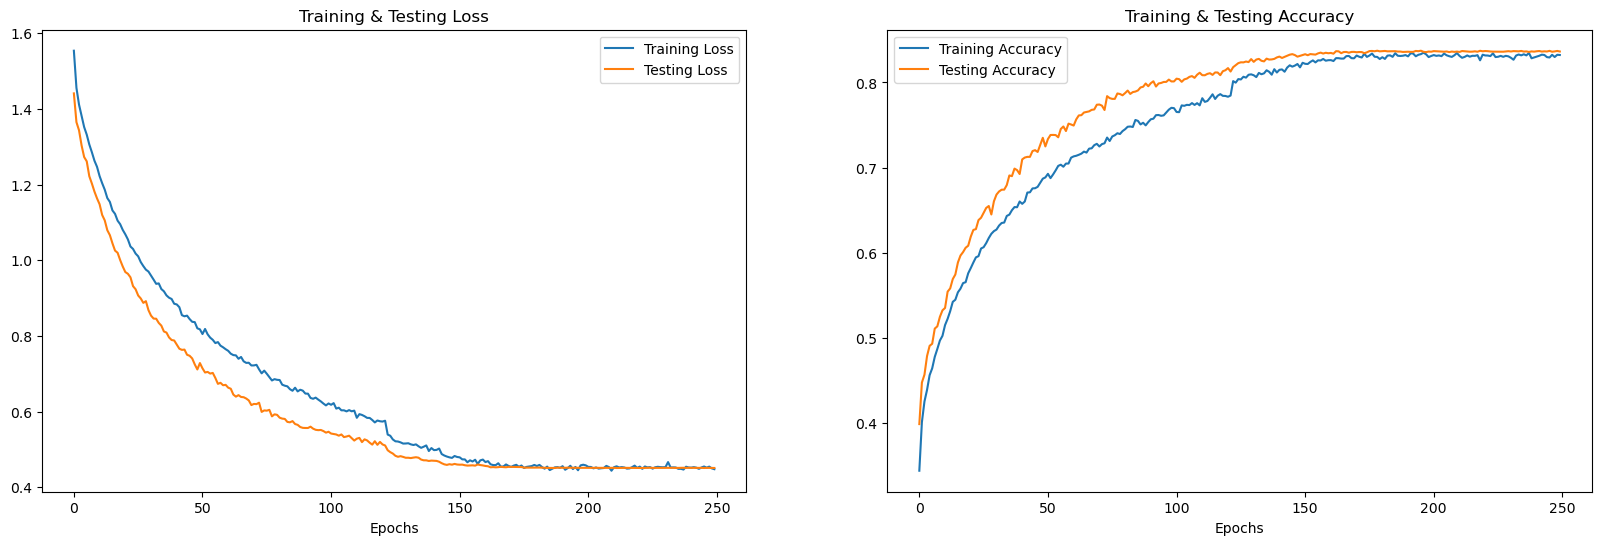

In [30]:
epochs = [i for i in range(250)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [31]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


In [32]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,disgust,disgust
1,neutral,neutral
2,angry,angry
3,disgust,disgust
4,fear,fear
5,neutral,neutral
6,disgust,disgust
7,sad,sad
8,disgust,disgust
9,angry,angry


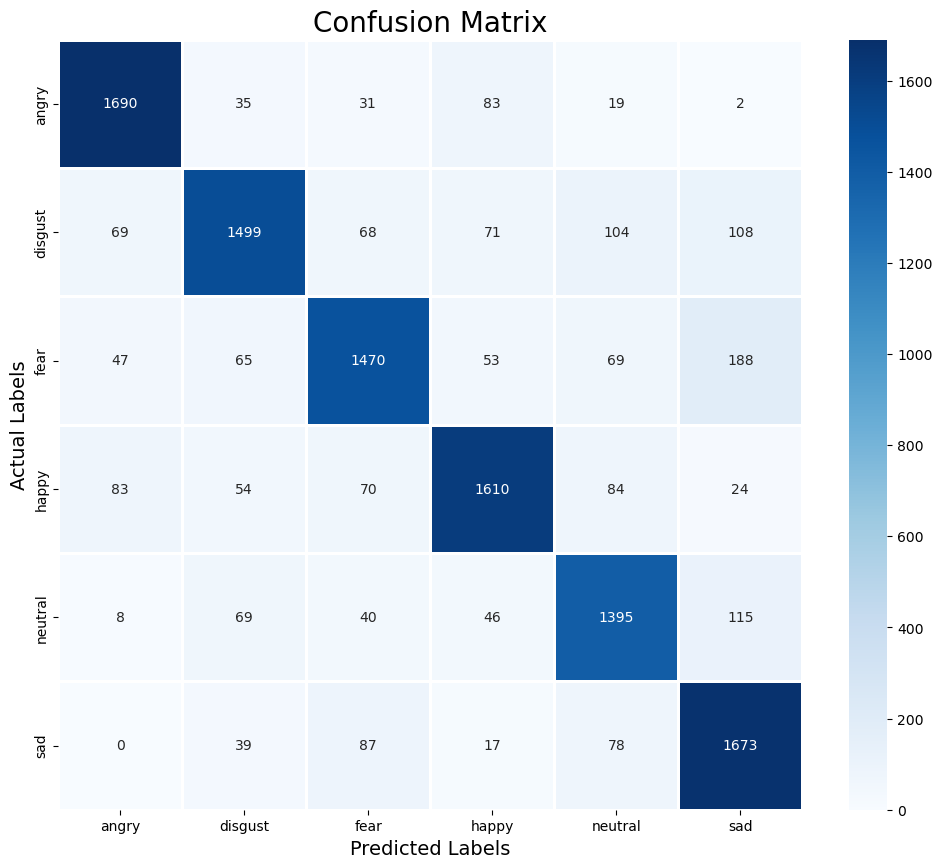

In [33]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [34]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

print(classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
              precision    recall  f1-score   support

       angry       0.89      0.91      0.90      1860
     disgust       0.85      0.78      0.81      1919
        fear       0.83      0.78      0.80      1892
       happy       0.86      0.84      0.85      1925
     neutral       0.80      0.83      0.82      1673
         sad       0.79      0.88      0.84      1894

    accuracy                           0.84     11163
   macro avg       0.84      0.84      0.84     11163
weighted avg       0.84      0.84      0.84     11163



In [35]:
# Save model architecture to JSON
model_json = model.to_json()
with open("SER_model.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights
model.save_weights("SER_model.weights.h5")

print("Model architecture and weights saved successfully!")


Model architecture and weights saved successfully!


In [36]:
model.save("SER_model.keras")


In [37]:
model.save("ser_model.h5")  # saves entire model in HDF5 format
